In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X, y = iris.data[:100], np.where(iris.target[:100] > 0, 1, -1)
X[:3], y[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([-1, -1, -1]))

In [3]:
# 加上 StandardScalar
# <---------------
# from sklearn.preprocessing import StandardScaler 
# ss = StandardScaler()
# X = ss.fit_transform(X)

In [4]:
from math import floor
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                   #權重改變比率
        self.n_iter = n_iter             #經過幾次的計算
        self.random_state = random_state #權重初始化亂數種子

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)                #初始化權重
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])#初始化權重個數= w0 + 所有特徵
        self.cost_ = []                                                #每一 round 計算的所有成本

        for i in range(self.n_iter):
            net_input = self.net_input(X)                              # 針對全部的資料進行預測值
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)                        # 經過啟動函數，這邊沒改變
            errors = (y - output)                                      # 真正資料 跟 預測的差距
            self.w_[1:] += self.eta * X.T.dot(errors)                  # 產生對應特徵變更的權重 X=100,4, error=100,1
            self.w_[0] += self.eta * errors.sum()                      # 產生w0變更的權重
            cost = (errors**2).sum() / 2.0                             # 計算該次(round)的所有資料差距產生成本
            self.cost_.append(cost)                                    # 針對該次產生成本加入變數
            # <--- 最後三次 當連續三次 的訓練成本 到小數點下三位都一樣( 無條件捨去 )
            if len(self.cost_)>3 and (floor(self.cost_[-3]*1000)/1000.0==floor(self.cost_[-2]*1000)/1000.0==floor(self.cost_[-1]*1000)/1000.0   ):
                print('Early Stopping', i)
                break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    # activation 20210916
    def logistic(self, X):
        return( 1/ (1+np.exp(-1*X)))
    
    def tanh(self, X):
        return( (np.exp(X) - np.exp(-1*X))/(np.exp(X) + np.exp(-1*X) ) )
    
    # 請你使用relu ?
    # https://en.wikipedia.org/wiki/Activation_function
    def relu(self, X):
        return(np.where(X <= 0, 0, X)  )
        
    def activation(self, X):
        """Compute linear activation"""
        return self.relu(X)
#         return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [5]:
# np.where
import numpy as np
test =np.array([-1, 2, 1 , -3, 9])
np.where(test <=0, 0, test)

array([0, 2, 1, 0, 9])

In [6]:
model = AdalineGD(n_iter=50000, eta=0.01) # <----------------改小
model.fit(X, y)

Early Stopping 4


In [7]:
# 怎樣讓 程式碼自動停止 當連續三次 的訓練成本 到小數點下三位都一樣 ?
model.cost_[-5:]

[50.0, 1879.7915997957848, 50.0, 50.0, 50.0]

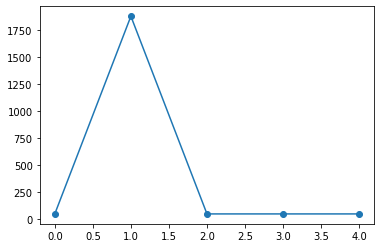

In [8]:
# 畫圖 <----------------------------- 針對 model.cost_ 取 log 再畫圖

import matplotlib.pyplot as plt
plt.plot(model.cost_)
plt.scatter(range(len(model.cost_)), model.cost_)
plt.show()

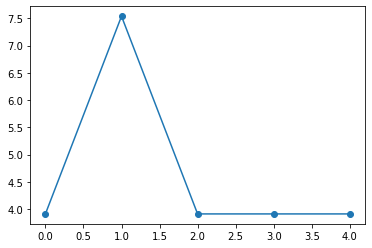

In [9]:
# 畫圖 <----------------------------- 針對 model.cost_ 取 log 再畫圖

import matplotlib.pyplot as plt
plt.plot(np.log(model.cost_))
plt.scatter(range(len(model.cost_)), np.log(model.cost_))
plt.show()